In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics:")
display(df.describe(include='all'))

Dataset Shape: (13320, 9)

First 5 rows:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00



Data Types:
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

Missing Values:
area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Descriptive Statistics:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


### 2. Data Cleaning

In [8]:
# Handle missing values
print("Percentage of missing values:")
print(df.isnull().mean() * 100)

# Drop columns with high percentage of missing values
df.drop(columns=['society'], inplace=True)  # Example - ~40% missing

# Fill missing values
df['balcony'].fillna(0, inplace=True)  # Assuming missing means no balcony
df['bath'].fillna(df['bath'].median(), inplace=True)

# Convert area_type to category
df['area_type'] = df['area_type'].astype('category')

# Remove outliers in price and sqft
df = df[(df['price'] < df['price'].quantile(0.99)) & 
        (df['total_sqft'] < df['total_sqft'].quantile(0.99))]

Percentage of missing values:
area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


C:\Users\mahesh sai\AppData\Local\Temp\ipykernel_22692\752661000.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].fillna(0, inplace=True)  # Assuming missing means no balcony
C:\Users\mahesh sai\AppData\Local\Temp\ipykernel_22692\752661000.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

TypeError: unsupported operand type(s) for -: 'str' and 'str'

### 3. Univariate Analysis

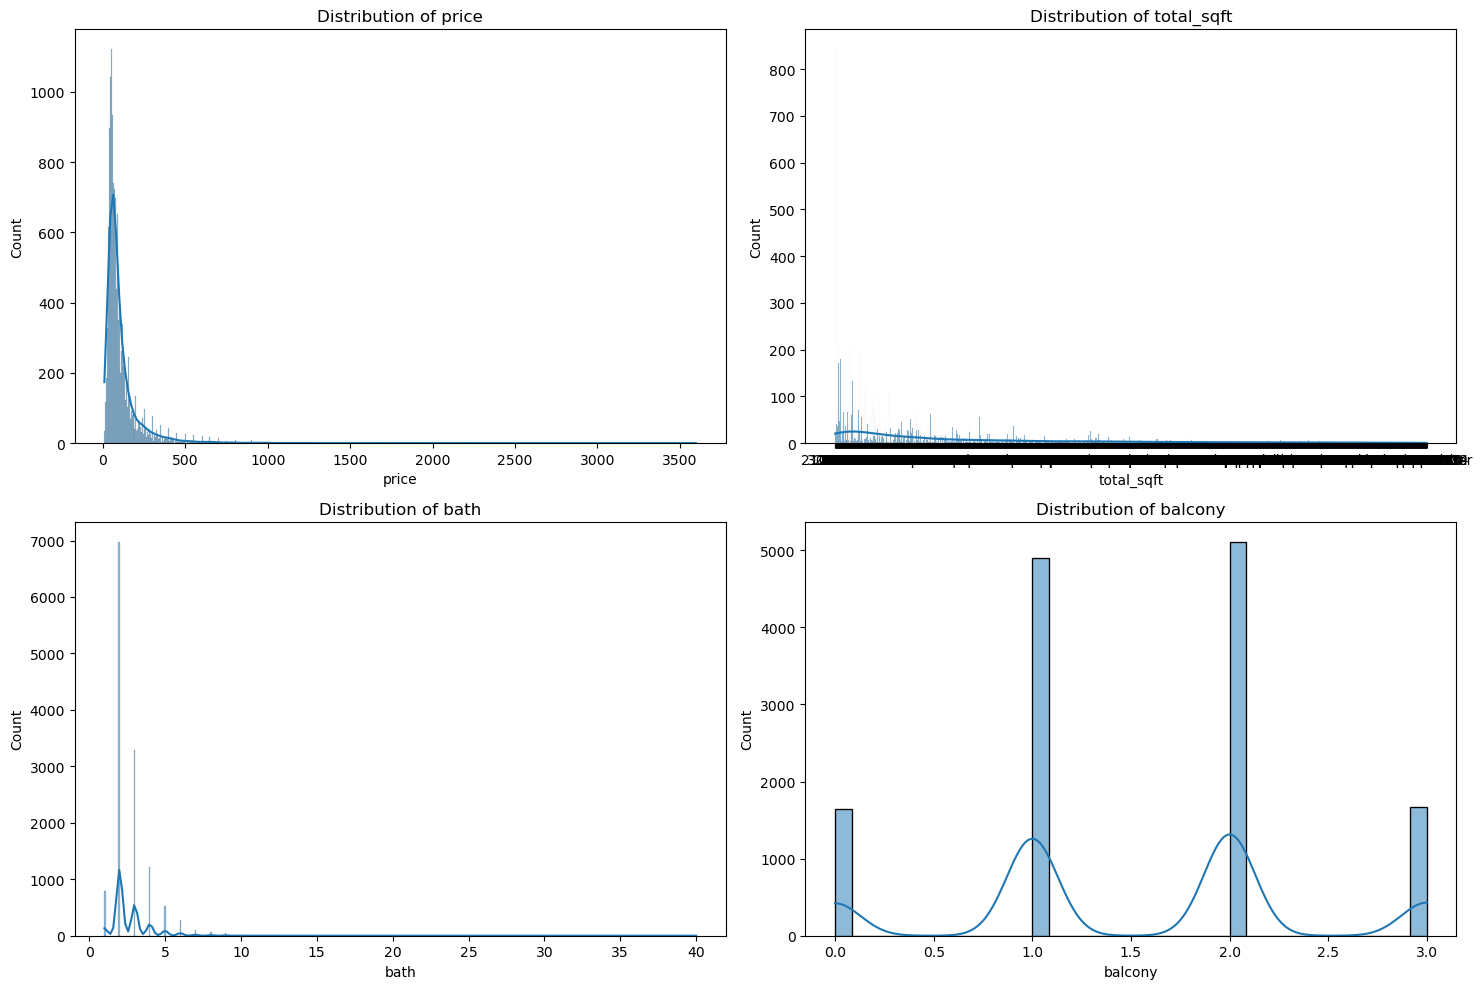


Statistics for price:
count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

Statistics for total_sqft:
count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

Statistics for bath:
count    13320.000000
mean         2.688814
std          1.338754
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

Statistics for balcony:
count    13320.000000
mean         1.511937
std          0.864240
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64


In [11]:
num_cols = ['price', 'total_sqft', 'bath', 'balcony']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

for col in num_cols:
    print(f"\nStatistics for {col}:")
    print(df[col].describe())

### 4. Bivariate Analysis

### Price vs Numerical Features

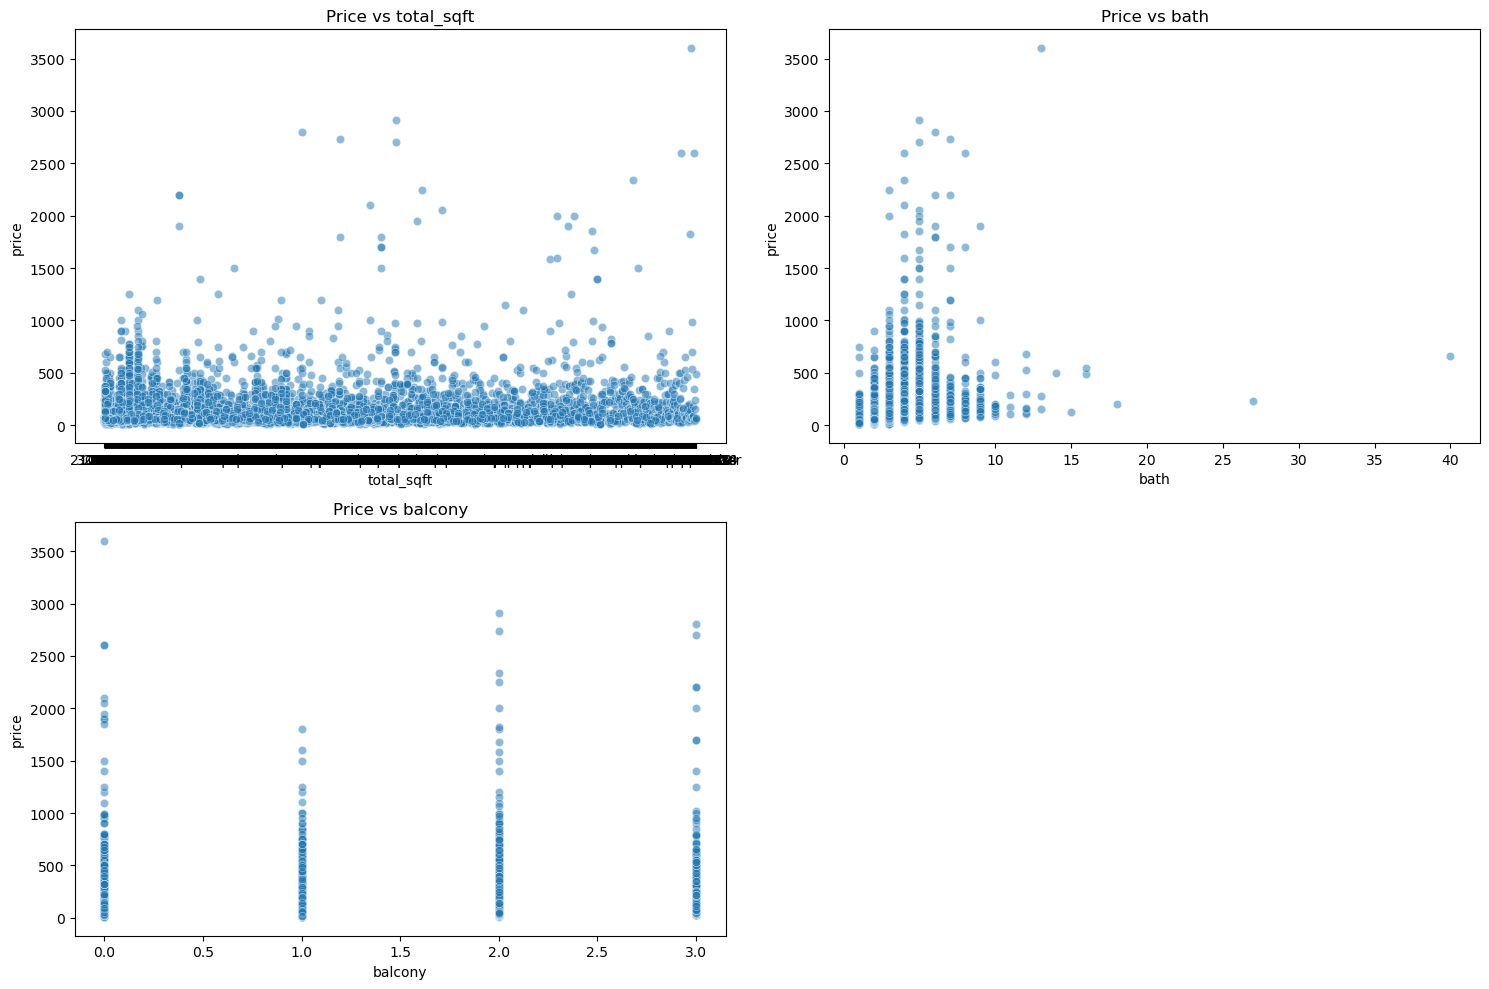

In [17]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[1:], 1):  # Skip price itself
    plt.subplot(2, 2, i)
    sns.scatterplot(x=col, y='price', data=df, alpha=0.5)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

### 5. Correlation Analysis

In [32]:
print(df['total_sqft'].unique())  # See what values exist
print(df['total_sqft'].dtype)     # Check current data type

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
object


In [34]:
# First attempt - simple conversion
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Check how many values couldn't be converted
print(f"Number of nulls after conversion: {df['total_sqft'].isnull().sum()}")


Number of nulls after conversion: 247


### 6. Location Analysis

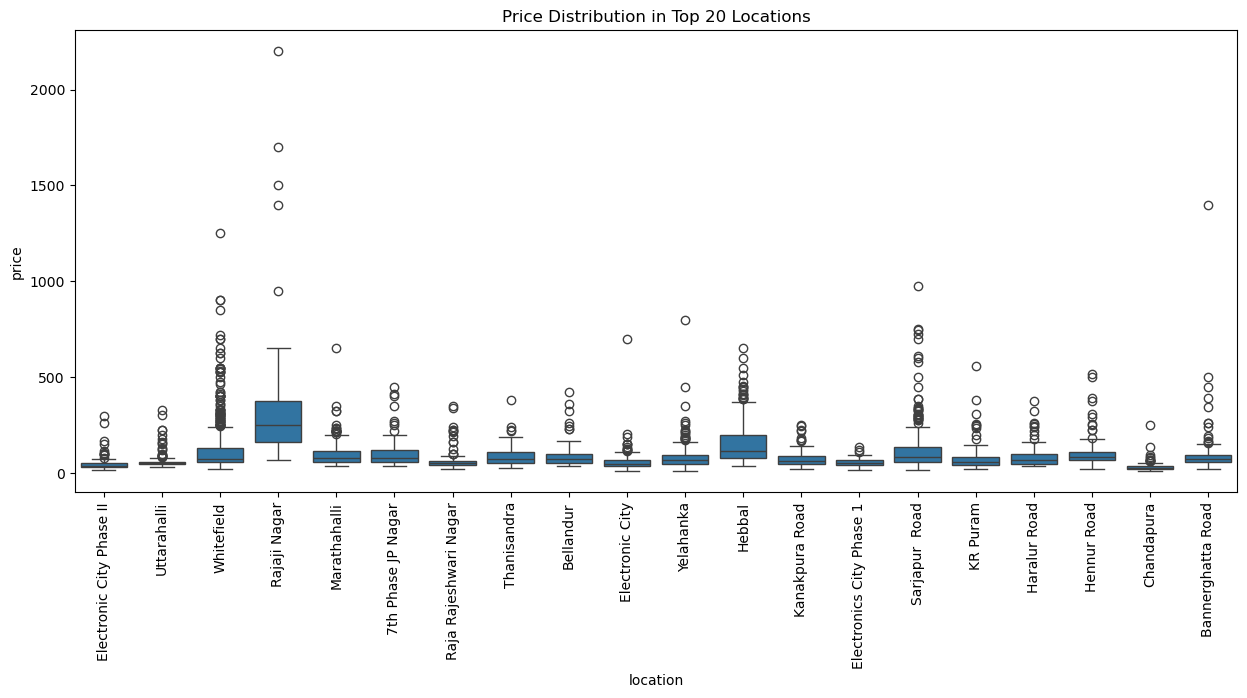

KeyError: 'Column not found: price_per_sqft'

In [23]:
# Top locations by number of properties
top_locations = df['location'].value_counts().nlargest(20).index

plt.figure(figsize=(15, 6))
sns.boxplot(x='location', y='price', data=df[df['location'].isin(top_locations)])
plt.xticks(rotation=90)
plt.title('Price Distribution in Top 20 Locations')
plt.show()

# Average price per sqft by location
avg_price = df.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(15, 6))
avg_price.plot(kind='bar')
plt.title('Top 20 Locations by Average Price per Sqft')
plt.ylabel('Price per Sqft')
plt.xticks(rotation=90)
plt.show()

### 8. Multivariate Analysis

In [30]:
# Price by BHK and Location
top_5_locations = df['location'].value_counts().nlargest(5).index
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='price', hue='BHK', 
            data=df[(df['location'].isin(top_5_locations)) & (df['BHK'] <= 4)],
            estimator=np.median)
plt.title('Median Price by Location and BHK')
plt.xticks(rotation=45)
plt.legend(title='BHK')
plt.show()

KeyError: 'BHK'

<Figure size 1200x600 with 0 Axes>